In [1]:
# Code used to create Figure 5.7 in Ch. 5 of LCA used other categories (bar plot) 
# Created 12Jul23 - for thesis VF submission
# Revisited on 5Sep23 to transform y-axis into logscale
# Based on Jupyter notebook: LCA_othercat_barplot

# Beware of the csv used as results changed see excel: 'Ch5 LCA Project Jua (19Jun23)'
# I manually ordered the columns to show results columns in descending order

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Move to path where csv is saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/LCA/Plots LCA PJua"
# maybe change path after i document it properly

cwd = os.getcwd()
cwd

os.chdir(path)

In [2]:
pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/LCA/Plots LCA PJua'

In [3]:
# Import results from LCA which are the copied values from tab 'S0_utilisation_rate' in
# excel 'Ch5 LCA Project Jua (6Jun23)' or 9Jun23, columns copied I, and columns P-V.
LCA_oc_used = pd.read_csv("LCA_cap_transport_used_order.csv")
# check type of columns
LCA_oc_used.dtypes

Site_name                 object
County                    object
Institution               object
HT (kg 1,4-DCBeq/kWh)    float64
CC (kg CO2eq/kWh)        float64
MD (kg Fe eq/kWh)        float64
FE (kg 1,4-DCBeq/kWh)    float64
ME (kg 1,4-DCBeq/kWh)    float64
TA (kg SO2eq/kWh)        float64
PMF (kg PM10eq/kWh)      float64
TE (kg 1,4-DCBeq/kWh)    float64
dtype: object

In [4]:
LCA_oc_used.columns

Index(['Site_name', 'County', 'Institution', 'HT (kg 1,4-DCBeq/kWh)',
       'CC (kg CO2eq/kWh)', 'MD (kg Fe eq/kWh)', 'FE (kg 1,4-DCBeq/kWh)',
       'ME (kg 1,4-DCBeq/kWh)', 'TA (kg SO2eq/kWh)', 'PMF (kg PM10eq/kWh)',
       'TE (kg 1,4-DCBeq/kWh)'],
      dtype='object')

In [5]:
LCA_oc_used.head().round(2) # original df is in kg

,Site_name,County,Institution,"HT (kg 1,4-DCBeq/kWh)",CC (kg CO2eq/kWh),MD (kg Fe eq/kWh),"FE (kg 1,4-DCBeq/kWh)","ME (kg 1,4-DCBeq/kWh)",TA (kg SO2eq/kWh),PMF (kg PM10eq/kWh),"TE (kg 1,4-DCBeq/kWh)"
0,AIC_Nadoto_Primary_School,Turkana,School,1.01,0.71,0.34,0.15,0.13,0.01,0.0,0.0
1,AIC_Nayanaekaton_Primary_School,Turkana,School,1.29,0.91,0.44,0.19,0.17,0.01,0.0,0.0
2,A_IC_Gangani_Primary_School,Kwale,School,0.73,0.44,0.25,0.11,0.10,0.00,0.0,0.0
3,Abagarse_Primary_School,Isiolo,School,1.40,0.94,0.48,0.21,0.19,0.01,0.0,0.0
4,Akadeli_Primary_School,Isiolo,School,0.59,0.40,0.20,0.09,0.08,0.00,0.0,0.0


In [6]:
# Change names of columns to convert all units from kg to g
LCA_oc_used_g = LCA_oc_used.rename(columns={"HT (kg 1,4-DCBeq/kWh)": "HT (g1,4-DCBeq/kWh)",\
                                            "CC (kg CO2eq/kWh)": "CC (gCO2eq/kWh)",\
                                            "MD (kg Fe eq/kWh)": "MD (gFeeq/kWh)",\
                                            "FE (kg 1,4-DCBeq/kWh)": "FE (g1,4-DCBeq/kWh)",\
                                            "ME (kg 1,4-DCBeq/kWh)": "ME (g1,4-DCBeq/kWh)",\
                                            "TA (kg SO2eq/kWh)": "TA (gSO2eq/kWh)",\
                                            "PMF (kg PM10eq/kWh)": "PMF (gPM10eq/kWh)",\
                                            "TE (kg 1,4-DCBeq/kWh)": "TE (g1,4-DCBeq/kWh)"})

In [7]:
# Check that columns name change (to grams) in new df created
LCA_oc_used_g.columns

Index(['Site_name', 'County', 'Institution', 'HT (g1,4-DCBeq/kWh)',
       'CC (gCO2eq/kWh)', 'MD (gFeeq/kWh)', 'FE (g1,4-DCBeq/kWh)',
       'ME (g1,4-DCBeq/kWh)', 'TA (gSO2eq/kWh)', 'PMF (gPM10eq/kWh)',
       'TE (g1,4-DCBeq/kWh)'],
      dtype='object')

In [8]:
# Multiply all columns of type "float64" by 1000 to convert values in df to grams (from kg to g)
LCA_oc_used_g[LCA_oc_used_g.select_dtypes(include=['float64']).columns] *= 1000

In [9]:
LCA_oc_used_g.head().round(2) # now it should be in g

,Site_name,County,Institution,"HT (g1,4-DCBeq/kWh)",CC (gCO2eq/kWh),MD (gFeeq/kWh),"FE (g1,4-DCBeq/kWh)","ME (g1,4-DCBeq/kWh)",TA (gSO2eq/kWh),PMF (gPM10eq/kWh),"TE (g1,4-DCBeq/kWh)"
0,AIC_Nadoto_Primary_School,Turkana,School,1007.93,709.99,341.85,146.41,134.32,5.26,2.31,0.99
1,AIC_Nayanaekaton_Primary_School,Turkana,School,1288.95,907.94,437.16,187.23,171.77,6.73,2.95,1.27
2,A_IC_Gangani_Primary_School,Kwale,School,731.38,444.77,250.37,108.30,99.23,3.61,1.57,0.71
3,Abagarse_Primary_School,Isiolo,School,1404.93,943.56,478.01,205.42,188.39,7.20,3.15,1.38
4,Akadeli_Primary_School,Isiolo,School,591.24,397.08,201.16,86.45,79.28,3.03,1.32,0.58


In [10]:
# To compare values and check values from kg to g are ok
LCA_oc_used_g.describe()  # this is the new df in grams

,"HT (g1,4-DCBeq/kWh)",CC (gCO2eq/kWh),MD (gFeeq/kWh),"FE (g1,4-DCBeq/kWh)","ME (g1,4-DCBeq/kWh)",TA (gSO2eq/kWh),PMF (gPM10eq/kWh),"TE (g1,4-DCBeq/kWh)"
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,831.878881,535.657571,282.831165,122.215005,112.080129,4.180684,1.827554,0.831079
std,501.146429,326.659548,171.149110,73.653956,67.514569,2.537843,1.106367,0.490294
min,206.251963,125.426292,70.606027,30.539612,27.984430,1.018426,0.442208,0.201387
25%,510.501805,326.416932,171.975995,74.456429,68.332335,2.541103,1.110852,0.517083
50%,699.396420,449.867407,237.818661,102.337224,93.811876,3.496282,1.524169,0.696292
75%,1029.064703,691.790593,352.099152,152.213814,139.487674,5.223265,2.280202,1.037980
max,3873.331674,2601.352564,1317.852426,566.337576,519.370771,19.848394,8.679561,3.801282


In [11]:
LCA_oc_used.describe()  # this is the original df in kgs

,"HT (kg 1,4-DCBeq/kWh)",CC (kg CO2eq/kWh),MD (kg Fe eq/kWh),"FE (kg 1,4-DCBeq/kWh)","ME (kg 1,4-DCBeq/kWh)",TA (kg SO2eq/kWh),PMF (kg PM10eq/kWh),"TE (kg 1,4-DCBeq/kWh)"
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.831879,0.535658,0.282831,0.122215,0.112080,0.004181,0.001828,0.000831
std,0.501146,0.326660,0.171149,0.073654,0.067515,0.002538,0.001106,0.000490
min,0.206252,0.125426,0.070606,0.030540,0.027984,0.001018,0.000442,0.000201
25%,0.510502,0.326417,0.171976,0.074456,0.068332,0.002541,0.001111,0.000517
50%,0.699396,0.449867,0.237819,0.102337,0.093812,0.003496,0.001524,0.000696
75%,1.029065,0.691791,0.352099,0.152214,0.139488,0.005223,0.002280,0.001038
max,3.873332,2.601353,1.317852,0.566338,0.519371,0.019848,0.008680,0.003801


In [12]:
# Now plot it!
import seaborn as sns
# Set style in Seaborn to plot
sns.set(rc={"figure.dpi":300})
sns.set_context("paper")  # change to notebook maybe? That is how it was in Chapter 4 first draft version 
sns.set_style("ticks")

[Text(0, 0, 'HT (kg 1,4-DCBeq/kWh)'),
 Text(1, 0, 'CC (kg CO2eq/kWh)'),
 Text(2, 0, 'MD (kg Fe eq/kWh)'),
 Text(3, 0, 'FE (kg 1,4-DCBeq/kWh)'),
 Text(4, 0, 'ME (kg 1,4-DCBeq/kWh)'),
 Text(5, 0, 'TA (kg SO2eq/kWh)'),
 Text(6, 0, 'PMF (kg PM10eq/kWh)'),
 Text(7, 0, 'TE (kg 1,4-DCBeq/kWh)')]

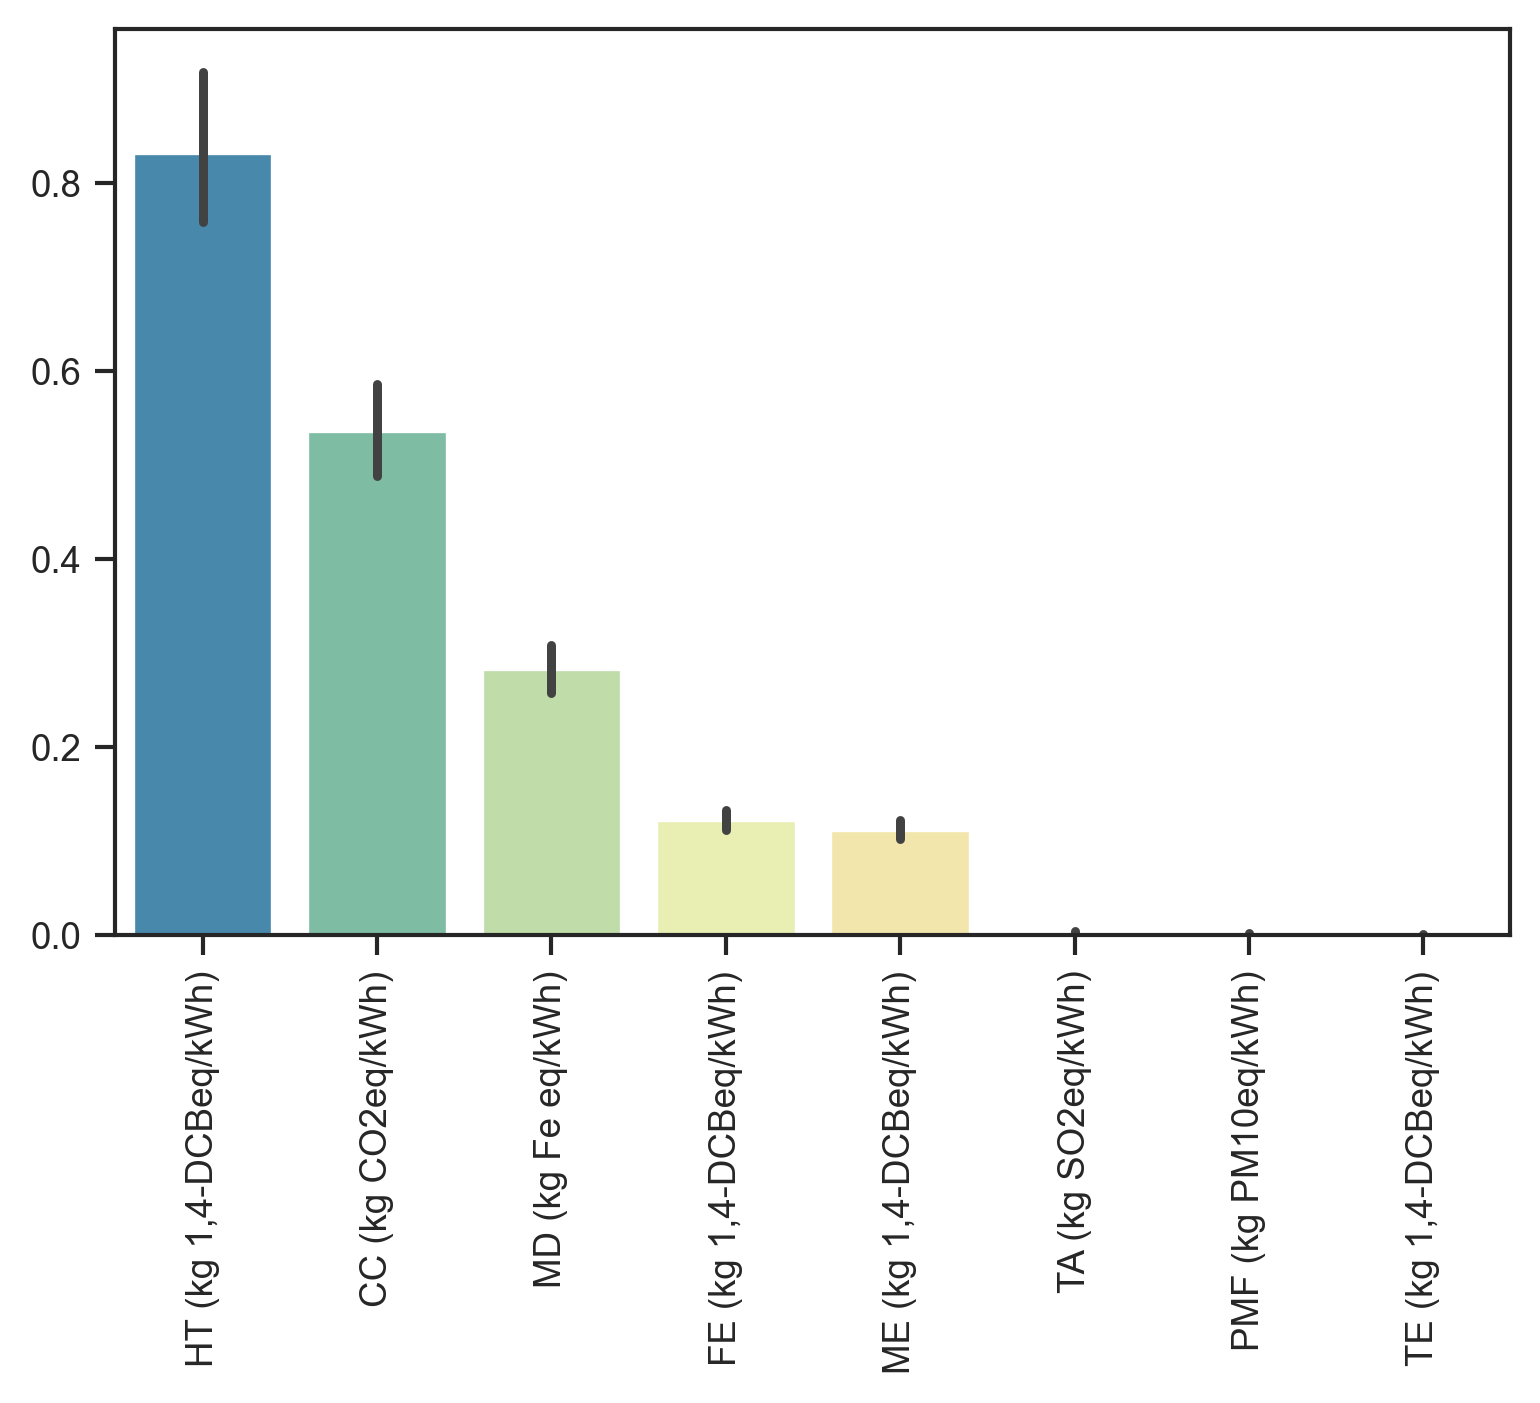

In [13]:
# Plot it as it was in Ch5 draft sent end of June in kgs (but now ordered)
ax=sns.barplot(data=LCA_oc_used, palette="Spectral_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

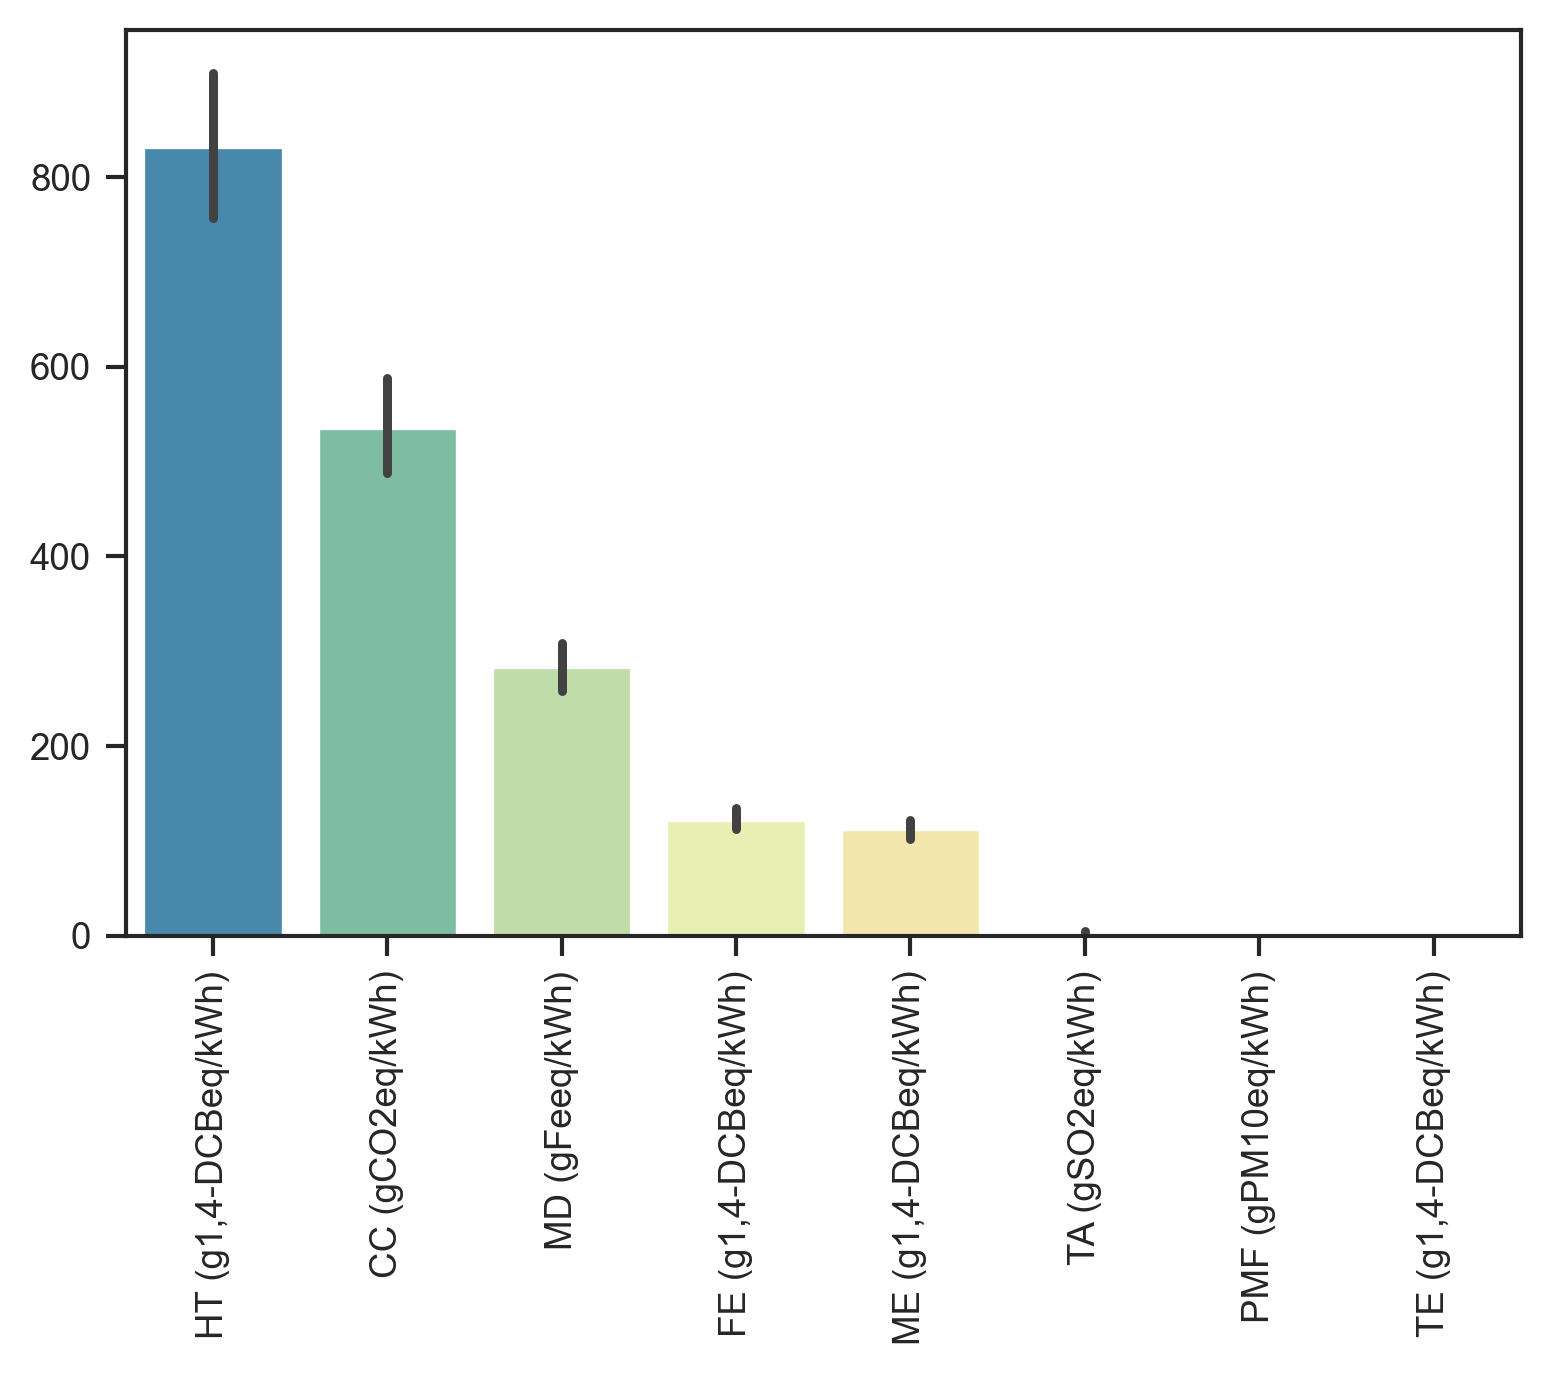

In [14]:
# Plot it for Ch5 VF thesis submission
ax=sns.barplot(data=LCA_oc_used_g, palette="Spectral_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.savefig("Fig_5.7.pdf", dpi=300, bbox_inches="tight")  # change name if need to rerun
plt.show()

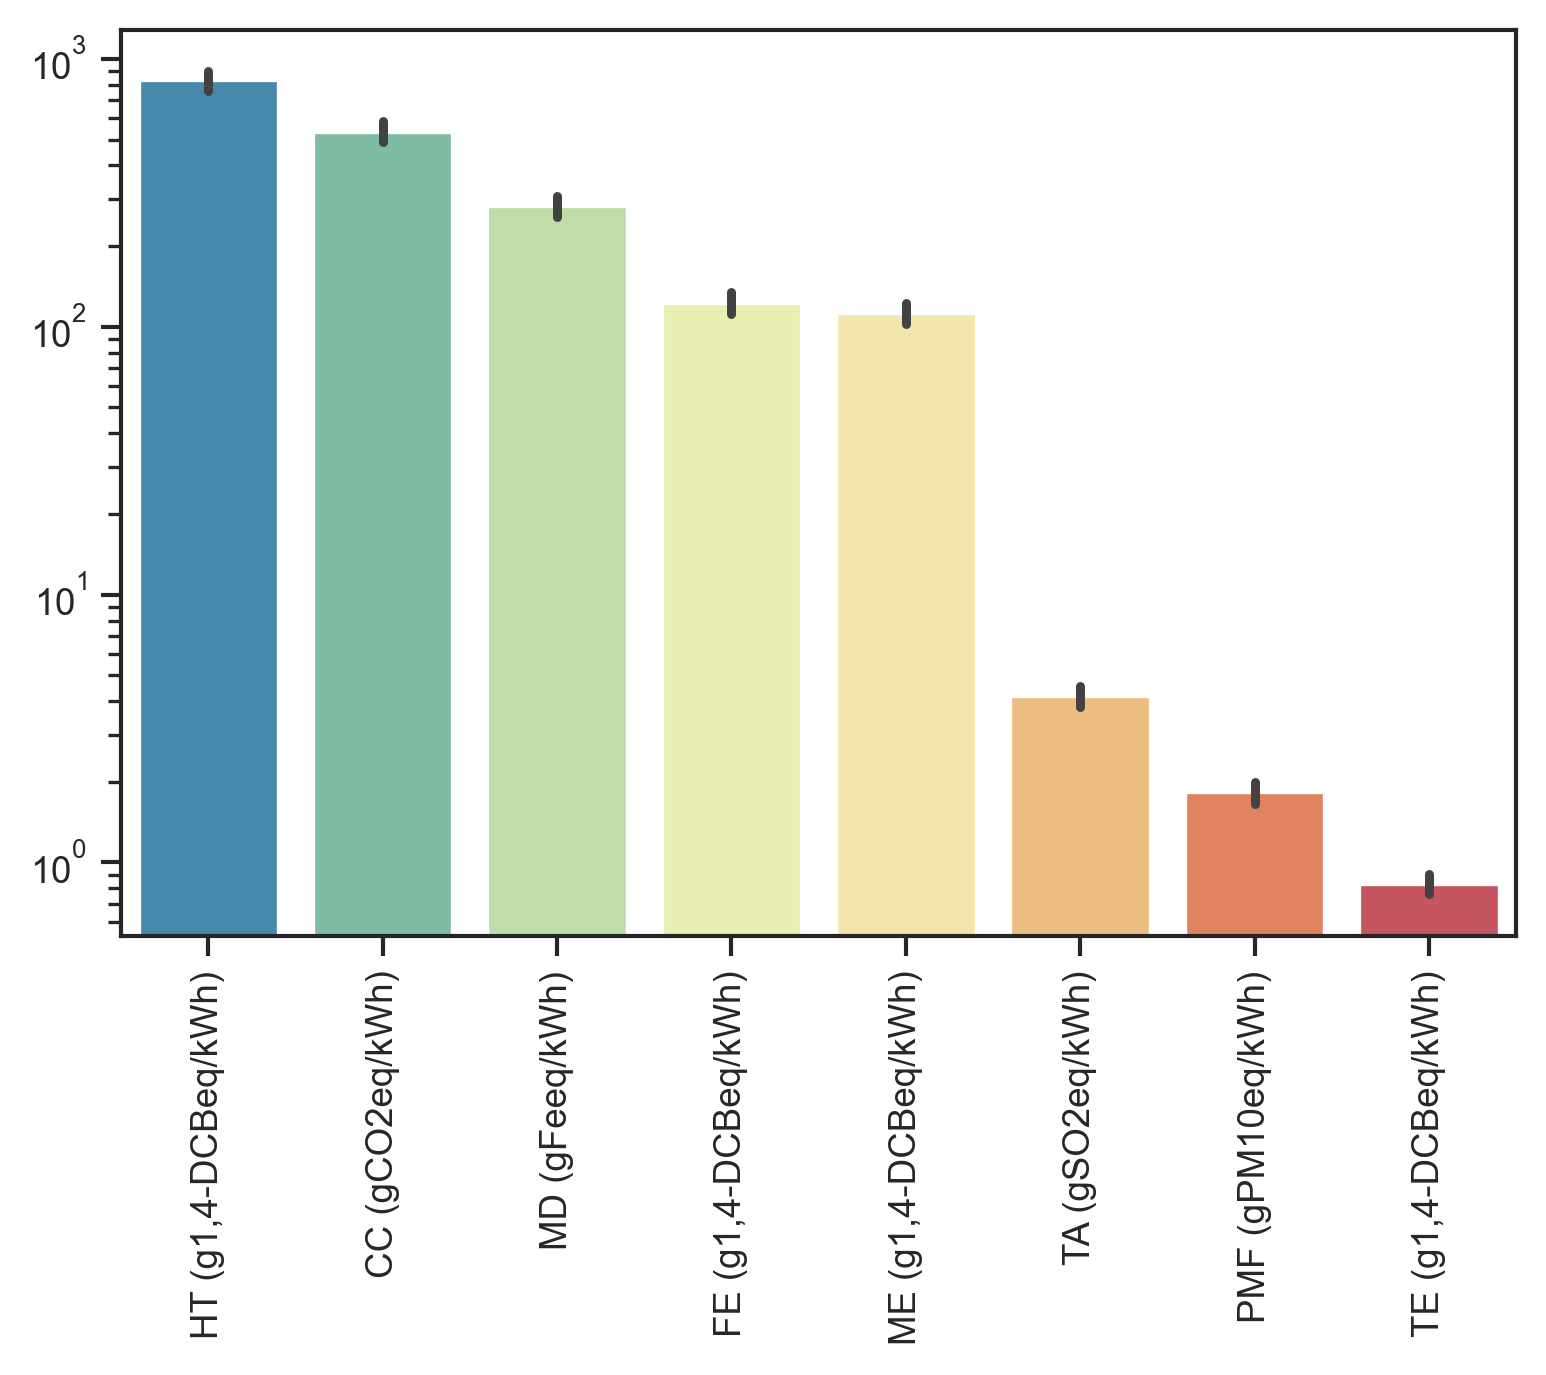

In [16]:
# If I rerun this code in the future, change the PDF figure name to keep previous copy (adding date maybe)
# I moved this manually to the folder "PhD thesis images submission"

# Check that the values considered are ok but they should be as csv is from LCA with everything (until transport)
# so scenario C

# Here I changed y-axis to log scale as it was suggested during the viva. This is with battery calculation of 2.1 kWh
# so how it was in thesis submission in July


ax=sns.barplot(data=LCA_oc_used_g, palette="Spectral_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.yscale("log")

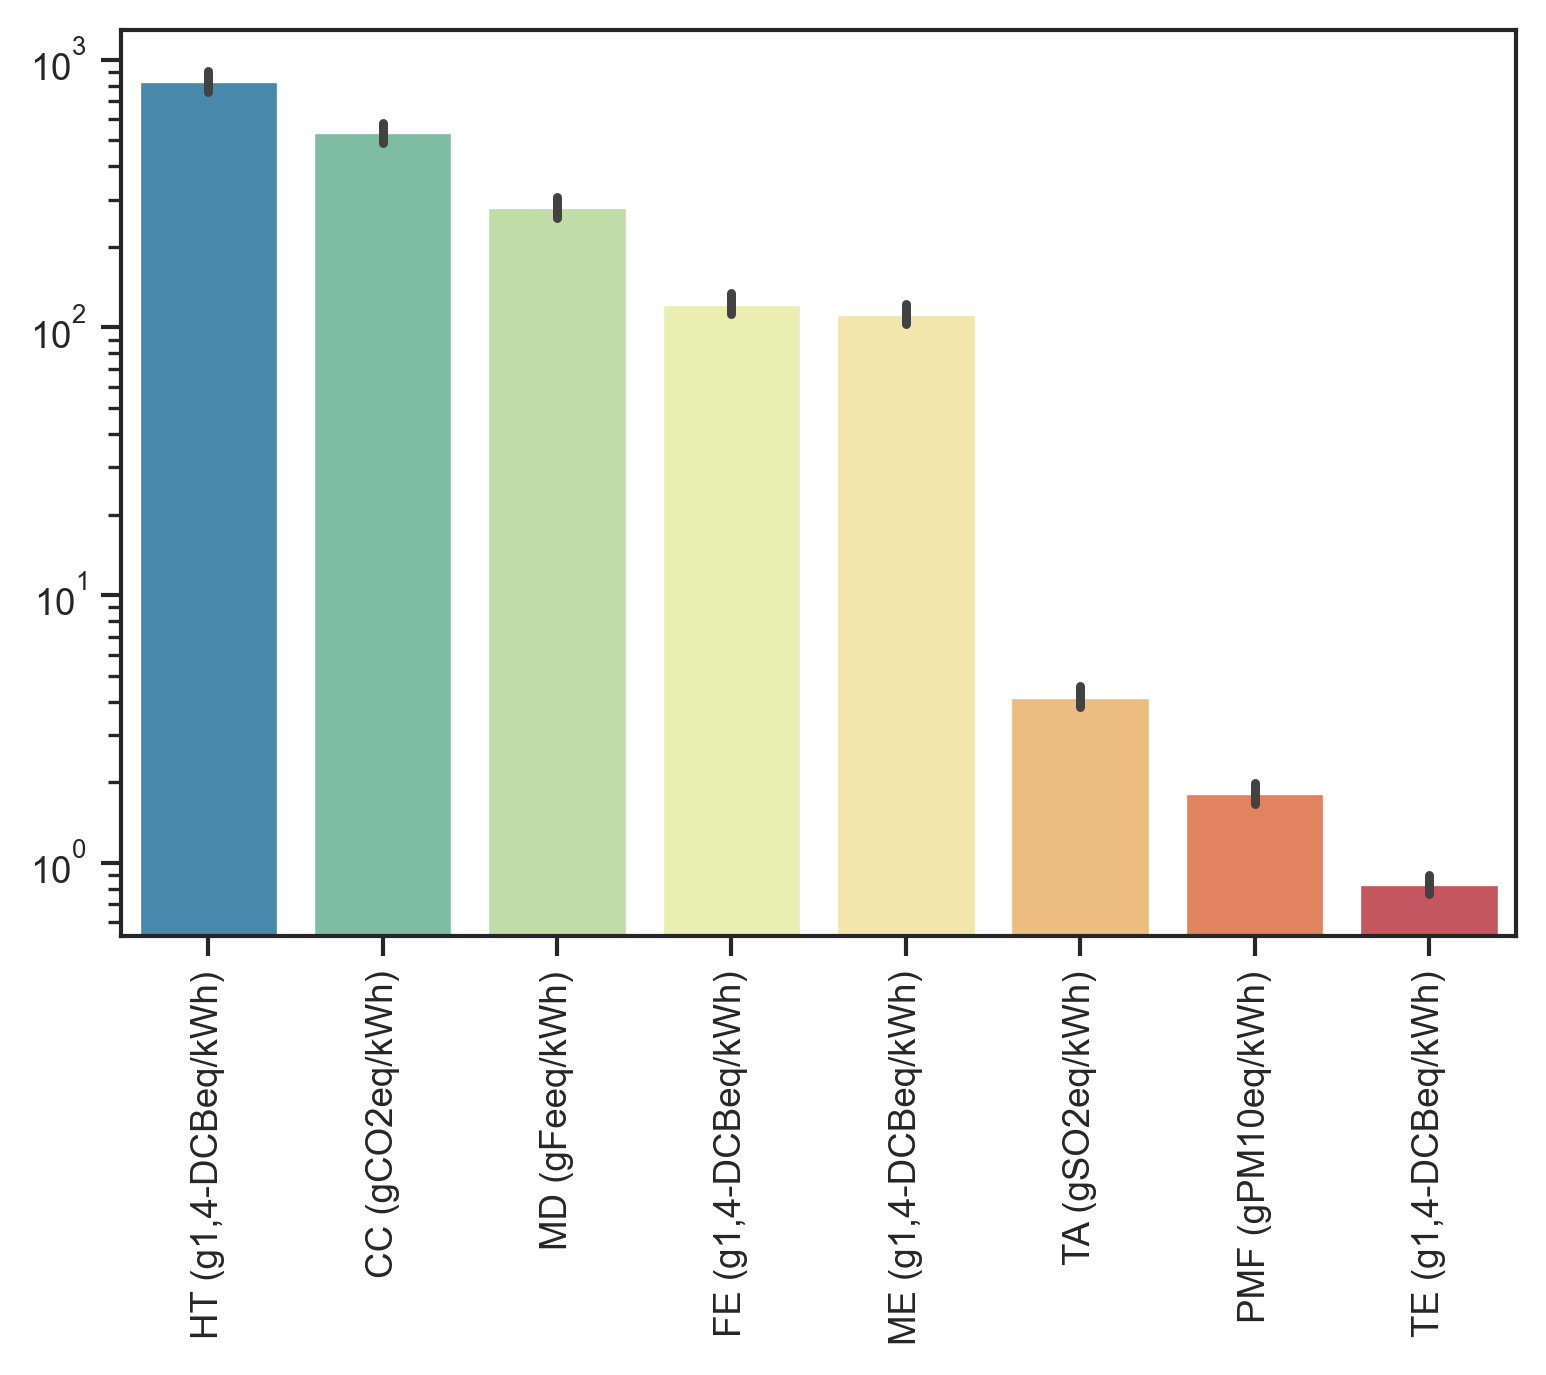

In [17]:
ax=sns.barplot(data=LCA_oc_used_g, palette="Spectral_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yscale("log")
plt.savefig("Fig_5.7_log.pdf", dpi=300, bbox_inches="tight")  # change name if need to rerun
plt.show()

In [ ]:
# useful link: https://stackoverflow.com/questions/45439833/how-to-log-scale-in-seaborn